# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
# Importing the required packages.
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
# Reading the data
data = pd.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [8]:
# Isolating the Required columns into s dataframe df.
df=data[['race','call']]

In [9]:
# Checking for missing values in the 2 columns. 
df.info()
#No missing data detected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null float32
dtypes: float32(1), object(1)
memory usage: 95.1+ KB


In [10]:
df.loc[df['race']=='w'].count()

race    2435
call    2435
dtype: int64

In [11]:
df.loc[df['race']=='b'].count()

race    2435
call    2435
dtype: int64

In [12]:
# plotting the Callbacks for white & Black sounding Names.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

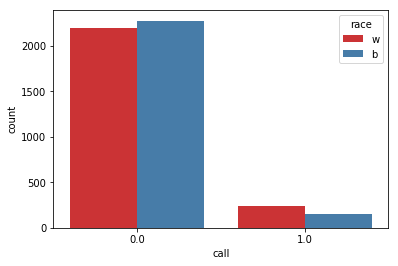

In [13]:
sns.countplot(x=df['call'],hue=df['race'],palette="Set1")

### We can see from the above fig that white sounding names indeed resulted in more callbacks, keeping other factors constant

In [14]:
# segregating the black & white data.
white=df.loc[df['race']=='w']
black=df.loc[df['race']=='b']


In [15]:
sw_statistics_w,pvalue_w=stats.shapiro(white['call'])
sw_statistics_b,pvalue_b=stats.shapiro(black['call'])

print('The p value corresponding to the callback rates for white sounding names is:',pvalue_w)
print('The p value corresponding to the callback rates for black sounding names is:',pvalue_b)

The p value corresponding to the callback rates for white sounding names is: 0.0
The p value corresponding to the callback rates for black sounding names is: 0.0


###  Shapirow wilk  p values corresponding to both white & black callback data are 0. Hence these 2 datasets don't appear to come from normally distributed populations

## Ans 1: Since  resumes were randomly assigned  white & black sounding names , the sample observations are iid and as there are 4870 observations in total , 2435 for each  category (a reasonably large dataset) , CLT is indeed applicable here. Further since we interested in knowing difference between mean call back rates for white & black applicants , 2 sample z test would be relevant here.
### Note: 2 sample t test is not applicable here as  call data does not come from normal distribution.


## Ans 2:
## H0 : The mean callback rates for black & white sounding names are same 
## H1 : The mean callback rates for black & white sounding names are different

### Applying 2 sample Z test to the test data

In [16]:
import statsmodels.stats.weightstats as st
z_statistics,pvalue =st.ztest(white['call'],black['call'])
print('The value of Z statistics is: ',z_statistics)
print('The pvalue corresponding to the Z statistics is: ',pvalue)

The value of Z statistics is:  4.114705356750735
The pvalue corresponding to the Z statistics is:  3.8767429116085706e-05


In [17]:
# Computing margin of error & 95% Z statistics confidence interval for the difference of white and black
# population mean callbacks.
n1 = len(white['call'])# Sample size for white names
n2 = len(black['call'])# Sample size for black names
s1 = white['call'].var()# sample variance for white names
s2 = black['call'].var()# sample variance for black names
den= (s1/n1+s2/n2)**.5
mw=white['call'].mean()
mb=black['call'].mean()
margin_of_error= 1.96 * den
conf_int=[(mw-mb)-1.96*den, (mw-mb)+1.96*den]
print('The margin of error for difference of means  is: ',margin_of_error)
print('The 95% confidence intervals for difference of white & black callbacks population means is: ',conf_int)

The margin of error for difference of means is:  0.015258417380692
The 95% confidence intervals for difference of white & black callbacks population means is:  [0.016774437474368575, 0.04729127223575258]


### From the above outputs we can easily make out that mean callback rate for the white sounding names resumes is indeed significantly more than that of black sounding resumes at even 1% level of significance.

### Applying bootstrap Approach


In [18]:
black_sf=black['call']-black['call'].mean()+white['call'].mean() # Shifting the black callback series so it has -
# - same mean as white callback series.
print('The mean of the shifted black series is: ',black_sf.mean())     
print('The mean of the white series is: ',white['call'].mean())
   

The mean of the shifted black series is:  0.09650764614343643
The mean of the white series is:  0.09650924056768417


### From above we can see that both shifted black series & white series have same mean. 

In [19]:
# Generating bootstraped samples
diff=[]# stores bootstraped means
inds=np.arange(len(white['call']))
for i in range(100000):
    bs_inds=np.random.choice(inds,len(inds))
    m_w=white['call'].iloc[bs_inds].mean()
    m_b=black_sf.iloc[bs_inds].mean()
    mean_diff=m_w-m_b
    diff.append(mean_diff)
    

In [20]:
# Determining 95% confidence interval
conf_int=np.percentile(diff,[2.5,97.5])
print('The 95% confidence interval for difference of means under null hypothesis is: ',conf_int)
Sample_diff=white['call'].mean()-black['call'].mean()
print('The given sample difference between white and black callback rates is: ', Sample_diff)
print('The margin of error for difference of means for bootstraped case under null hypothesis  is: ', (conf_int[1]-conf_int[0])/2)

The 95% confidence interval for difference of means under null hypothesis is:  [-0.01231879  0.01232179]
The given sample difference between white and black callback rates is:  0.03203285485506058
The margin of error for difference of means for bootstraped case under null hypothesis  is:  0.012320291344076395


In [21]:
pvalue=len([x for x in diff if x>=Sample_diff])/100000
print('The pvalue assosiated with the null hypothesis of mean white & black callback rates being equal is: ',pvalue)

The pvalue assosiated with the null hypothesis of mean white & black callback rates being equal is:  0.0


### Thus from bootstrap method we observe that given  sample mean difference between white & black callback rates does not lie in the 95% confidence interval and also the associated p value is 0.

## Ans 3: The p values, 95% confidence intervals & margin of error  for both 2 sample Z test & bootstraped case are as given above.

## Ans 4: The above analysis confirms racial discrimination does exist during the hiring process. Given other things being equal, a white sounding name is more likely to get a call back than a black sounding name.

## Ans 5: No our analysis doesn't mean that race/name is the most imp factor for a callback, as we only examined the effect of race in callbacks. There certainly would be other important  factors apart from the race which are important in order to get a call back. Multiple regression models involving other  predictors can be one technique, we can employ to compare & contrast other relevant factors.